In [48]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import utils
from scipy.optimize import curve_fit
import importlib
from cycler import cycler
from matplotlib.ticker import MultipleLocator
from pathlib import Path
#importlib.reload(utils)

# Cyclohexane

In [50]:
# ------------------------------------------------------------------
# 0 · a helper that turns any scan file into a clean DataFrame
#     (Mass, Pressure)  ← edit sep= / usecols= / dtype= as needed
# ------------------------------------------------------------------
def load_scan(path):
    return (
        pd.read_csv(
            path,
            skiprows=22,              # header lines
            sep=",",                 # comma-delimited (trailing comma OK)
            skipinitialspace=True,
            names=["Mass", "Pressure (uncorrected)", "trash"],
            usecols=[0, 1],          # keep just the first two columns
            dtype=float
        )
        .set_index("Mass")           # Mass as the index → easy alignment
    )

# ------------------------------------------------------------------
# 1 · load the background once
# ------------------------------------------------------------------
bkg = load_scan("Data/cyclo_bg.txt")          # rows = Mass values

data_dict = {}

path = 'Data/Cyclo_data.txt'
df = load_scan(path)

# align on Mass and subtract               (automatic index alignment)
df["Pressure"] = (df["Pressure (uncorrected)"] - bkg["Pressure (uncorrected)"]).clip(lower=0)

# store in the dict under a short key, e.g. "Kr-1"
data_dict['Cyclohexane'] = df.reset_index()   # back to columns if you prefer

# ------------------------------------------------------------------
# 3 · check one entry
# ------------------------------------------------------------------
print(data_dict["Cyclohexane"].head())


   Mass  Pressure (uncorrected)      Pressure
0   1.0            9.320000e-09  9.249300e-09
1   1.1            1.260000e-08  1.246900e-08
2   1.2            1.930000e-08  1.851300e-08
3   1.3            5.570000e-08  4.080000e-08
4   1.4            3.720000e-08  3.076000e-08


In [60]:
bkg = load_scan("Data/eth_bg.txt")
path = 'Data/eth_1.txt'
df = load_scan(path)

# align on Mass and subtract               (automatic index alignment)
df["Pressure"] = (df["Pressure (uncorrected)"] - bkg["Pressure (uncorrected)"]).clip(lower=0)

# store in the dict under a short key, e.g. "Kr-1"
data_dict['Ethanol'] = df.reset_index()   # back to columns if you prefer

In [61]:
# --- read the file --------------------------------------------------------
eth_df = pd.read_csv(
        "Data/eth_1.txt",
        skiprows=22,                 # skip the 22-line header
        sep=",",                     # comma-delimited
        skipinitialspace=True,       # eat the blanks after each comma
        names=["Mass", "Pressure (torr)", "trash"],   # 3rd column = trailing comma
        usecols=[0, 1],              # keep only Mass & Pressure
        dtype=float                  # read them directly as floats
)

# --- normalise intensity --------------------------------------------------
eth_df["Intensity"] = 100 * eth_df["Pressure (torr)"] / eth_df["Pressure (torr)"].max()

# --- pack into a dictionary (if you still need that) ----------------------
data_dict['Ethanol'] = eth_df

In [62]:
print(data_dict.keys())

dict_keys(['Cyclohexane', 'Ethanol'])


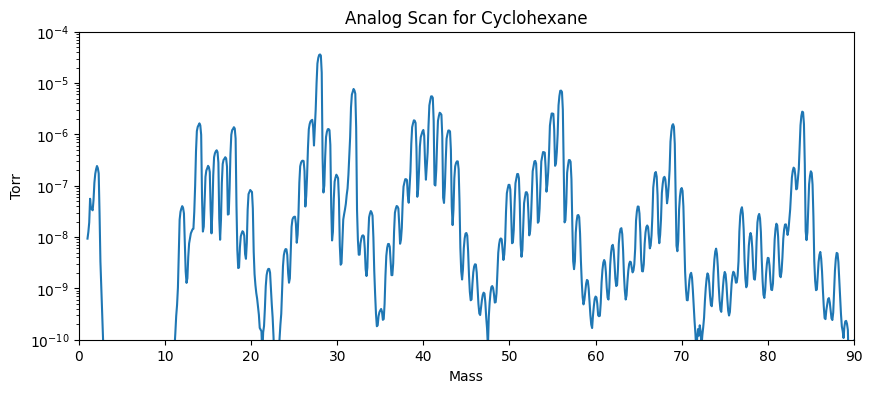

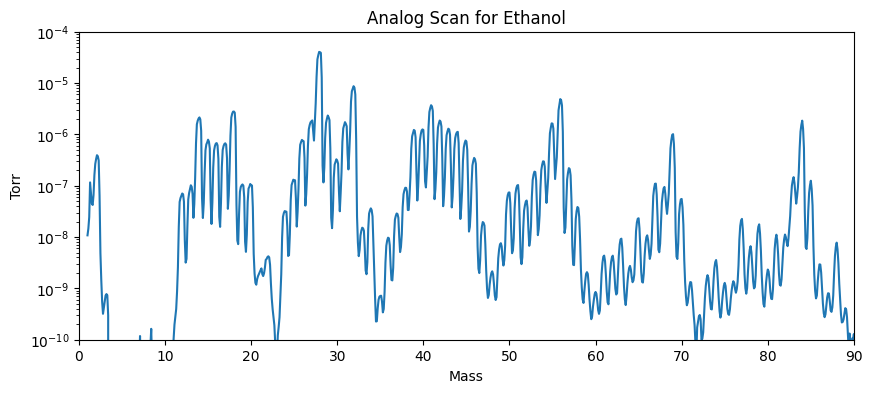

In [66]:
for key, data in data_dict.items():
    fig, ax = plt.subplots(figsize=(10, 4))
#     ax.axvline(x=2,                   # x-coordinate where the line should appear
#            color='red',            # any Matplotlib colour
#            linestyle='--',         # '--', ':', '-.', or solid '-'
#            linewidth=1.5,
#            label='m/z 42')         # optional legend entry
#     ax.axvline(x=28,                   # x-coordinate where the line should appear
#            color='red',            # any Matplotlib colour
#            linestyle='--',         # '--', ':', '-.', or solid '-'
#            linewidth=1.5,
#            label='m/z 42')         # optional legend entry
    ax.set_ylim(bottom=1e-10, top=1e-4)
    ax.set_xlim(0, 90)
    ax.set_yscale('log')
    ax.plot(data['Mass'], data['Pressure (torr)'])
    ax.set(xlabel='Mass', ylabel='Torr', title=f'Analog Scan for {key}')
    plt.show()
    

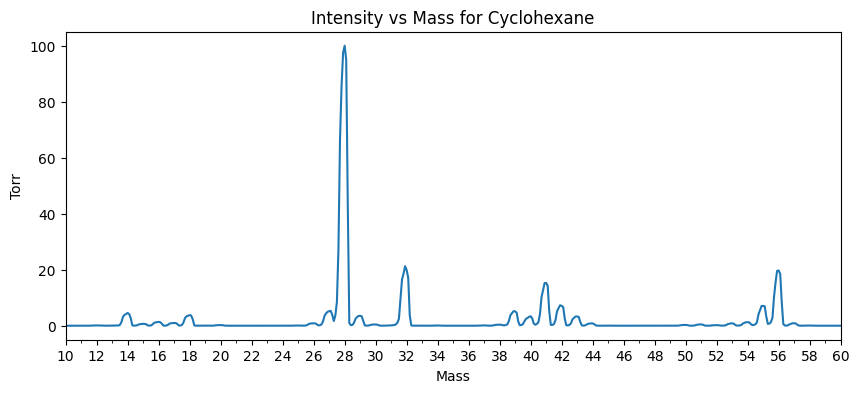

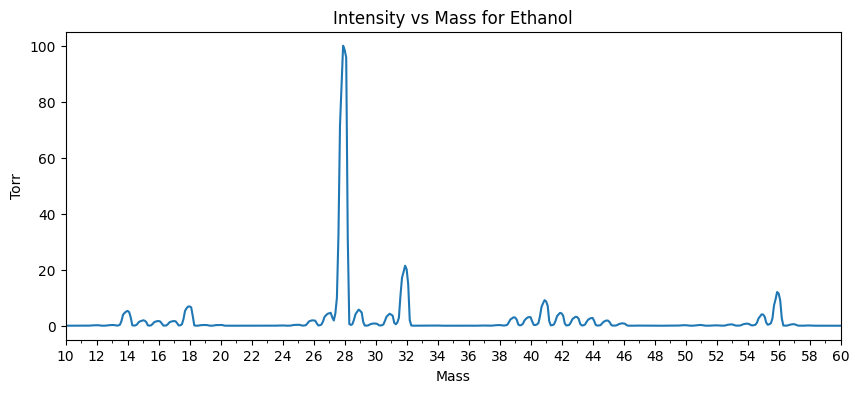

In [65]:
for key, data in data_dict.items():
    fig, ax = plt.subplots(figsize=(10, 4))
    ax.plot(data['Mass'], data['Intensity'])
    ax.xaxis.set_major_locator(MultipleLocator(2))
    ax.xaxis.set_minor_locator(MultipleLocator(1))
    #    ax.axvline(x=2,                   # x-coordinate where the line should appear
    #        color='red',            # any Matplotlib colour
    #        linestyle='--',         # '--', ':', '-.', or solid '-'
    #        linewidth=1.5,
    #        label='m/z 42')         # optional legend entry
    #    ax.axvline(x=28,                   # x-coordinate where the line should appear
    #        color='red',            # any Matplotlib colour
    #        linestyle='--',         # '--', ':', '-.', or solid '-'
    #        linewidth=1.5,
    #        label='m/z 42')         # optional legend entry
    #    ax.axvline(x=42,                   # x-coordinate where the line should appear
    #        color='red',            # any Matplotlib colour
    #        linestyle='--',         # '--', ':', '-.', or solid '-'
    #        linewidth=1.5,
    #        label='m/z 42')         # optional legend entry
    ax.set_xlim(10, 60)
    ax.set(xlabel='Mass', ylabel='Torr', title=f'Intensity vs Mass for {key}')
    plt.show()
    